In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

def compute_accuracy(loader, model):
    correct, total = 0, 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=12):
    train_accs, test_accs = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_acc = compute_accuracy(trainloader, model)
        test_acc = compute_accuracy(testloader, model)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f'Epoch {epoch+1}: Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')
    return train_accs, test_accs

def plot_accuracies(train_accs, test_accs, title):
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.legend()
    plt.show()

Files already downloaded and verified
Files already downloaded and verified


Training Logistic Regression
Epoch 1: Train Acc: 26.31%, Test Acc: 31.07%
Epoch 2: Train Acc: 25.21%, Test Acc: 29.89%
Epoch 3: Train Acc: 24.55%, Test Acc: 29.32%
Epoch 4: Train Acc: 25.51%, Test Acc: 29.56%
Epoch 5: Train Acc: 26.39%, Test Acc: 30.48%
Epoch 6: Train Acc: 25.66%, Test Acc: 30.45%
Epoch 7: Train Acc: 24.96%, Test Acc: 30.09%
Epoch 8: Train Acc: 26.54%, Test Acc: 31.27%
Epoch 9: Train Acc: 24.54%, Test Acc: 30.68%
Epoch 10: Train Acc: 25.07%, Test Acc: 29.71%
Epoch 11: Train Acc: 25.06%, Test Acc: 31.04%
Epoch 12: Train Acc: 24.47%, Test Acc: 28.84%
Final Test Accuracy for Logistic Regression: 28.84%


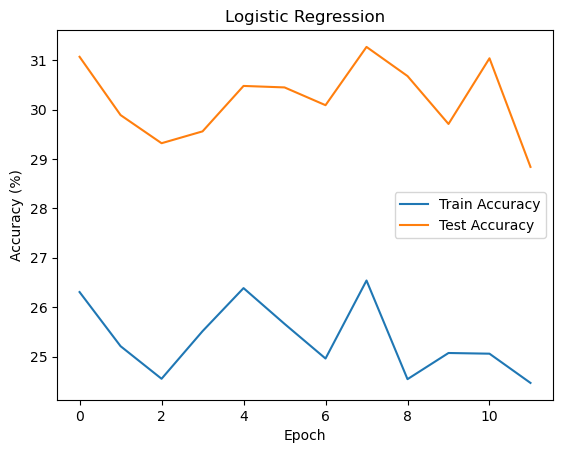

In [2]:
# Defining the Logistic Regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.fc = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc(x)
        return x


model = LogisticRegression().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


print("Training Logistic Regression")
train_accs, test_accs = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=12)

print(f"Final Test Accuracy for Logistic Regression: {test_accs[-1]:.2f}%")

plot_accuracies(train_accs, test_accs, "Logistic Regression")

Training 1 Hidden Layer FC
Epoch 1: Train Acc: 36.56%, Test Acc: 39.73%
Epoch 2: Train Acc: 40.49%, Test Acc: 43.11%
Epoch 3: Train Acc: 42.31%, Test Acc: 42.92%
Epoch 4: Train Acc: 42.97%, Test Acc: 42.40%
Epoch 5: Train Acc: 41.77%, Test Acc: 43.15%
Epoch 6: Train Acc: 42.22%, Test Acc: 40.32%
Epoch 7: Train Acc: 44.36%, Test Acc: 44.04%
Epoch 8: Train Acc: 44.99%, Test Acc: 46.23%
Epoch 9: Train Acc: 44.83%, Test Acc: 43.36%
Epoch 10: Train Acc: 43.84%, Test Acc: 43.64%
Epoch 11: Train Acc: 44.82%, Test Acc: 40.06%
Epoch 12: Train Acc: 44.06%, Test Acc: 43.43%
Final Test Accuracy for 1 Hidden Layer FC: 43.43%


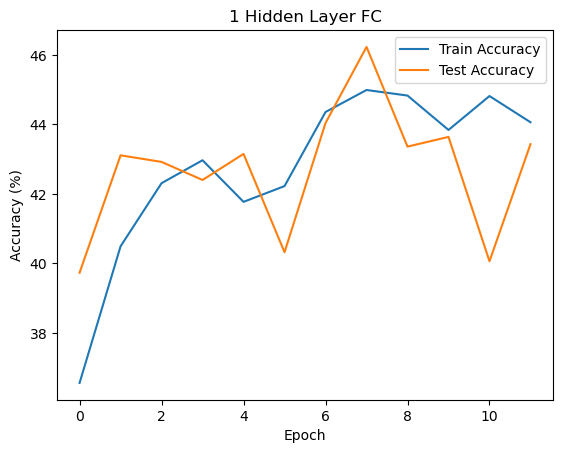

In [3]:
# Defining the Fully Connected model with 1 hidden layer
class FC1Hidden(nn.Module):
    def __init__(self, M=500):
        super(FC1Hidden, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, M)
        self.fc2 = nn.Linear(M, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = FC1Hidden(M=500).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model for 12 epochs
print("Training 1 Hidden Layer FC")
train_accs, test_accs = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=12)

print(f"Final Test Accuracy for 1 Hidden Layer FC: {test_accs[-1]:.2f}%")

plot_accuracies(train_accs, test_accs, "1 Hidden Layer FC")

Files already downloaded and verified
Files already downloaded and verified
Training 1 Conv + MaxPool
Epoch 1: Train Acc: 51.33%, Test Acc: 55.94%
Epoch 2: Train Acc: 52.65%, Test Acc: 59.15%
Epoch 3: Train Acc: 57.28%, Test Acc: 61.51%
Epoch 4: Train Acc: 57.67%, Test Acc: 62.32%
Epoch 5: Train Acc: 59.76%, Test Acc: 63.95%
Epoch 6: Train Acc: 59.58%, Test Acc: 64.03%
Epoch 7: Train Acc: 59.13%, Test Acc: 62.84%
Epoch 8: Train Acc: 58.85%, Test Acc: 63.60%
Epoch 9: Train Acc: 62.36%, Test Acc: 66.36%
Epoch 10: Train Acc: 61.67%, Test Acc: 66.01%
Epoch 11: Train Acc: 62.71%, Test Acc: 65.93%
Epoch 12: Train Acc: 61.48%, Test Acc: 65.31%
Final Test Accuracy for 1 Conv + MaxPool: 65.31%


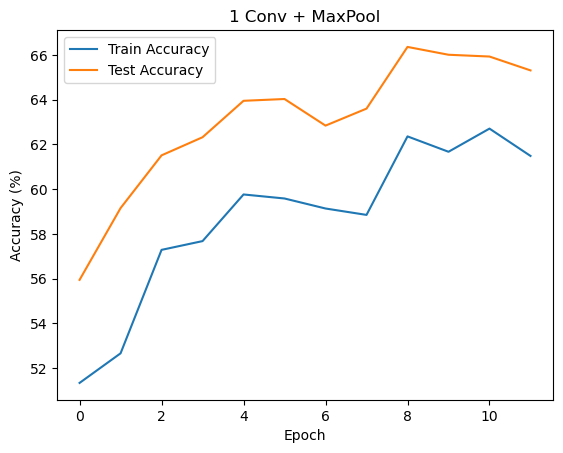

In [3]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

def compute_accuracy(loader, model):
    correct, total = 0, 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=12):
    train_accs, test_accs = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_acc = compute_accuracy(trainloader, model)
        test_acc = compute_accuracy(testloader, model)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        print(f'Epoch {epoch+1}: Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')
    return train_accs, test_accs

def plot_accuracies(train_accs, test_accs, title):
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(title)
    plt.legend()
    plt.show()

# Defining the Conv + MaxPool model with adjusted pooling
class Conv1MaxPool(nn.Module):
    def __init__(self, M=100, p=5, N=9):  # Changed N to 9 to get 3x3 output
        super(Conv1MaxPool, self).__init__()
        self.conv1 = nn.Conv2d(3, M, p)
        self.pool = nn.MaxPool2d(N, N)
        self.out_size = M * 3 * 3  # 100 * 3 * 3 = 900
        self.fc = nn.Linear(self.out_size, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = x.view(-1, self.out_size)
        x = self.fc(x)
        return x

# Initializing the model, criterion, and optimizer
model = Conv1MaxPool(M=100, p=5, N=9).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model for 12 epochs
print("Training 1 Conv + MaxPool")
train_accs, test_accs = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=12)

print(f"Final Test Accuracy for 1 Conv + MaxPool: {test_accs[-1]:.2f}%")

plot_accuracies(train_accs, test_accs, "1 Conv + MaxPool")
plt.savefig("conv_maxpool_plot.png")
plt.close()

Training Tuned Tutorial CNN


Epoch 1: Train Acc: 41.05%, Test Acc: 43.65%
Epoch 2: Train Acc: 49.46%, Test Acc: 50.77%
Epoch 3: Train Acc: 54.82%, Test Acc: 57.45%
Epoch 4: Train Acc: 56.52%, Test Acc: 59.51%
Epoch 5: Train Acc: 58.74%, Test Acc: 61.06%
Epoch 6: Train Acc: 60.81%, Test Acc: 62.96%
Epoch 7: Train Acc: 62.01%, Test Acc: 63.66%
Epoch 8: Train Acc: 63.05%, Test Acc: 64.87%
Epoch 9: Train Acc: 63.45%, Test Acc: 64.94%
Epoch 10: Train Acc: 63.84%, Test Acc: 65.71%
Epoch 11: Train Acc: 65.12%, Test Acc: 67.71%
Epoch 12: Train Acc: 65.96%, Test Acc: 69.04%
Epoch 13: Train Acc: 65.80%, Test Acc: 66.89%
Epoch 14: Train Acc: 67.29%, Test Acc: 69.44%
Epoch 15: Train Acc: 67.19%, Test Acc: 67.83%
Epoch 16: Train Acc: 68.19%, Test Acc: 69.75%
Epoch 17: Train Acc: 68.43%, Test Acc: 69.78%
Epoch 18: Train Acc: 68.23%, Test Acc: 69.23%
Epoch 19: Train Acc: 69.29%, Test Acc: 71.45%
Epoch 20: Train Acc: 69.27%, Test Acc: 70.38%
Epoch 21: Train Acc: 69.51%, Test Acc: 70.26%
Epoch 22: Train Acc: 69.48%, Test Acc: 70.9

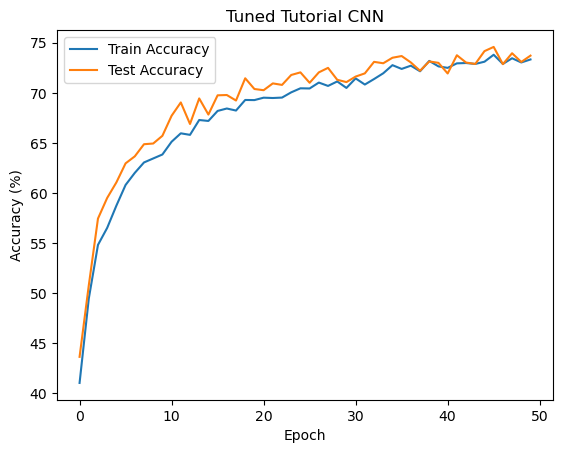

In [4]:
# Defining the Tuned CNN model
class TutorialCNN(nn.Module):
    def __init__(self):
        super(TutorialCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64 * 6 * 6, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = TutorialCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training the model for 50 epochs
print("Training Tuned Tutorial CNN")
train_accs, test_accs = train_model(model, trainloader, testloader, criterion, optimizer, num_epochs=50)

print(f"Final Test Accuracy for Tuned Tutorial CNN: {test_accs[-1]:.2f}%")

plot_accuracies(train_accs, test_accs, "Tuned Tutorial CNN")